In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

# Load dataset

In [2]:
DATASET_PATH = './dataset/salaries.csv'

def get_dataset(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    df = df.drop(columns=['salary_currency', 'salary'])
    df = df.drop(df[df.work_year < 2023].index)
    df = df.drop(df[df.experience_level == 'EN'].index)
    df = df.drop(df[df.experience_level == 'EX'].index)
    df = df[df.employment_type == 'FT']
    df = df.drop(df[df.company_size == 'S'].index)
    df = df[df.company_location == 'US']
    df = df[df.employee_residence == 'US']
    accepted_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer']
    df = df[df.job_title.isin(accepted_job_titles)]
    accepted_remote_ratio = [0, 100]
    df = df[df.remote_ratio.isin(accepted_remote_ratio)]
    df = df.drop(columns=['employee_residence', 'company_location','employment_type'])
    return df

dataset = get_dataset(DATASET_PATH)
print(f"\nJob Title:\n{dataset.job_title.value_counts()}")
print(f"\nCompany Size:\n{dataset.company_size.value_counts()}")
print(f"\nExperience_level:\n{dataset.experience_level.value_counts()}")
print(f"\nRemote Ratio:\n{dataset.remote_ratio.value_counts()}")
print(f"\nJob Title:\n{dataset.job_title.value_counts()}")
dataset.head()


Job Title:
Data Engineer                2435
Data Scientist               2397
Data Analyst                 1441
Machine Learning Engineer    1370
Name: job_title, dtype: int64

Company Size:
M    7536
L     107
Name: company_size, dtype: int64

Experience_level:
SE    5783
MI    1860
Name: experience_level, dtype: int64

Remote Ratio:
0      5372
100    2271
Name: remote_ratio, dtype: int64

Job Title:
Data Engineer                2435
Data Scientist               2397
Data Analyst                 1441
Machine Learning Engineer    1370
Name: job_title, dtype: int64


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size
12,2024,MI,Data Analyst,112300,0,M
13,2024,MI,Data Analyst,75100,0,M
22,2024,SE,Machine Learning Engineer,190000,0,M
23,2024,SE,Machine Learning Engineer,100000,0,M
24,2024,MI,Data Scientist,150650,0,M


In [3]:
# To replace string values with numbers

dataset_no_str = dataset.copy()
columns_to_map = ['experience_level', 'job_title', 'company_size']
for c in columns_to_map:
    unique_values = dataset_no_str[c].unique()
    mapping = {val: index for index, val in enumerate(unique_values)}
    print(mapping)
    dataset_no_str[c].replace(mapping, inplace=True)
    
del columns_to_map, c, unique_values, mapping
    
dataset_no_str.head()

{'MI': 0, 'SE': 1}
{'Data Analyst': 0, 'Machine Learning Engineer': 1, 'Data Scientist': 2, 'Data Engineer': 3}
{'M': 0, 'L': 1}


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size
12,2024,0,0,112300,0,0
13,2024,0,0,75100,0,0
22,2024,1,1,190000,0,0
23,2024,1,1,100000,0,0
24,2024,0,2,150650,0,0


In [4]:
# Source: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(df: pd.DataFrame, feature: list, drop_first = False) -> pd.DataFrame:
    dummies = pd.get_dummies(df[feature], drop_first=drop_first, prefix=feature)
    result = pd.concat([df, dummies], axis=1)
    result = result.drop([feature], axis=1)
    return result

# dataset_encoded = dataset.copy()
# features_to_encode = ['work_year', 'experience_level', 'job_title','company_size']
# for f in features_to_encode:
#     dataset_encoded = encode_and_bind(dataset_encoded, f, drop_first=True)

# del f, features_to_encode

# dataset_encoded.head()

# Build Model: GES

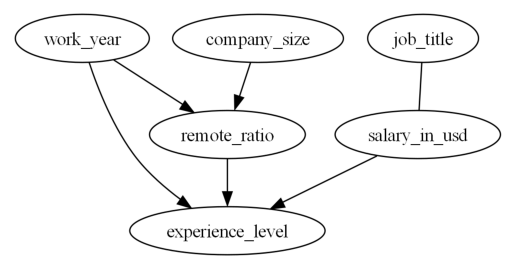

The score of this learned graph is [[170429.90552731]]


In [8]:
# Define array
data = dataset_no_str.to_numpy()
data.shape

# Run the method
Record = ges(data)
pyd = GraphUtils.to_pydot(Record['G'], labels=list(dataset.columns))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

print(f"The score of this learned graph is {Record['score']}")